In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=1711e0943e1ef52a4c60baaf56a7151e3032ccf846bfa9d268dbf52b54a267e8
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [2]:
import util


X, y= util.mnist_init('integrated')

In [3]:
import numpy as np


class PCA:
    def __init__(self, data, k, method):
        self.data = data
        self.k = k
        self.w = None
        self.method = method
        self.vh = None

    def fit(self):
        n = self.data.shape[0]
        self.data = self.data - self.data.mean(axis=0)
        if self.method == "ed":
            cov = np.dot(self.data.T, self.data) / (n - 1)
            val, pca = np.linalg.eig(cov)
            index = np.argsort(val)[::-1][:self.k]
            self.w = pca[:, index].real

        elif self.method == "svd":
            self.data = self.data / np.sqrt(n - 1)
            u, s, self.vh = np.linalg.svd(self.data)
        

    def transform(self):
        if self.method == "ed":
          return np.dot(self.data, self.w)

        elif self.method == "svd":
          return np.dot(self.data, self.vh[range(self.k),:].T)

    def fit_and_transform(self):
        self.fit()
        return self.transform()


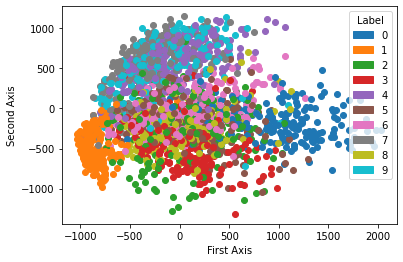

In [ ]:
pca = PCA(X, 2, method="ed")
proj_X = pca.fit_and_transform()
size = 2000
util.proj_peek(proj_X[:size], y[:size], 10)

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


class LDA:
    def __init__(self, data, label, k):
        self.data = data
        self.label = label
        self.clf = LinearDiscriminantAnalysis(n_components=k)

    def fit(self):
        self.clf.fit(self.data, self.label)

    def transform(self):
        return self.clf.transform(self.data)

    def fit_and_transform(self):
        return self.clf.fit_transform(self.data, self.label)

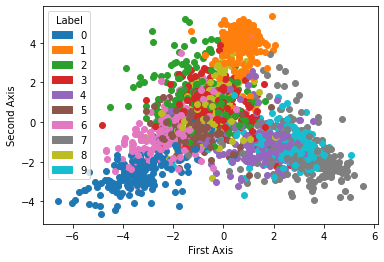

In [ ]:
lda = LDA(X, y, 2)
proj_X = lda.fit_and_transform()
size = 2000
util.proj_peek(proj_X[:size], y[:size], 10)

In [ ]:
pca1 = PCA(X, 100, method="ed")
proj_X1 = pca1.fit_and_transform()

pca2 = PCA(X, 225, method="ed")
proj_X2 = pca2.fit_and_transform()

pca3 = PCA(X, 400, method="ed")
proj_X3 = pca3.fit_and_transform()

pca4 = PCA(X, 625, method="ed")
proj_X4 = pca4.fit_and_transform()

lda1 = LDA(X, y, 4)
proj_X5 = lda1.fit_and_transform()

lda2 = LDA(X, y, 9)
proj_X6 = lda2.fit_and_transform()

lda3 = LDA(proj_X2, y, 9)
proj_X7 = lda3.fit_and_transform()

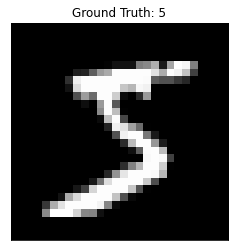

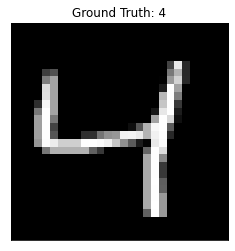

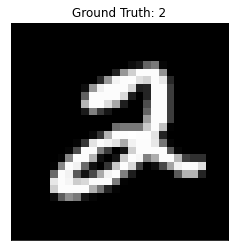

In [5]:
util.image_peek(X[0], y[0])
util.image_peek(X[2], y[2])
util.image_peek(X[5], y[5])

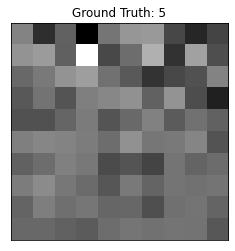

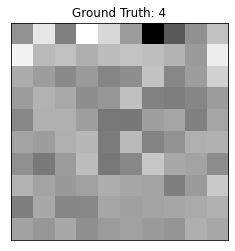

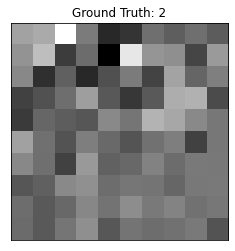

In [ ]:
util.image_peek(proj_X1[0], y[0])
util.image_peek(proj_X1[2], y[2])
util.image_peek(proj_X1[5], y[5])

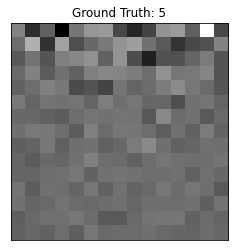

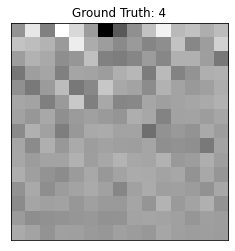

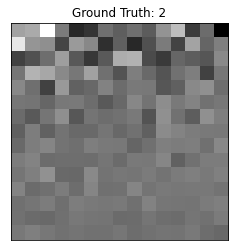

In [ ]:
util.image_peek(proj_X2[0], y[0])
util.image_peek(proj_X2[2], y[2])
util.image_peek(proj_X2[5], y[5])

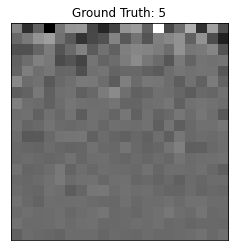

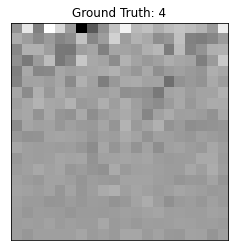

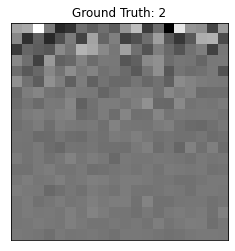

In [ ]:
util.image_peek(proj_X3[0], y[0])
util.image_peek(proj_X3[2], y[2])
util.image_peek(proj_X3[5], y[5])

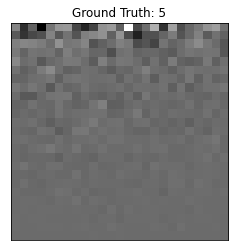

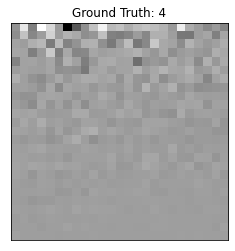

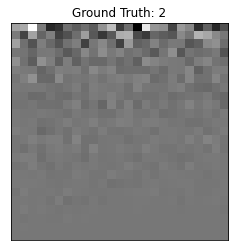

In [ ]:
util.image_peek(proj_X4[0], y[0])
util.image_peek(proj_X4[2], y[2])
util.image_peek(proj_X4[5], y[5])

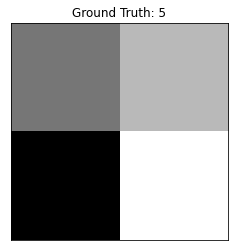

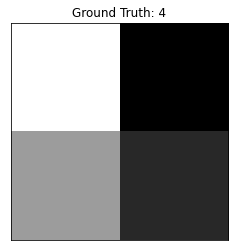

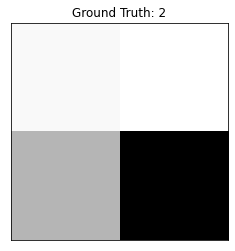

In [ ]:
util.image_peek(proj_X5[0], y[0])
util.image_peek(proj_X5[2], y[2])
util.image_peek(proj_X5[5], y[5])

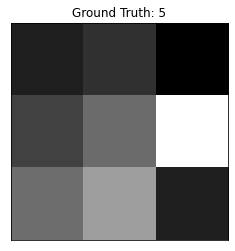

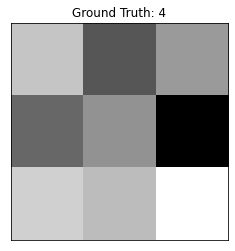

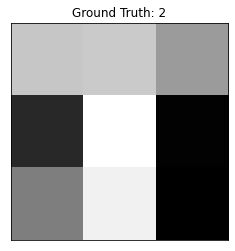

In [ ]:
util.image_peek(proj_X6[0], y[0])
util.image_peek(proj_X6[2], y[2])
util.image_peek(proj_X6[5], y[5])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

clf = SVC()

In [ ]:
cross_val_score(clf, proj_X1, y, cv=10)

array([0.98371429, 0.98342857, 0.98442857, 0.98214286, 0.98328571,
       0.982     , 0.97942857, 0.98142857, 0.98242857, 0.98785714])

In [ ]:
cross_val_score(clf, proj_X2, y, cv=10)

array([0.98385714, 0.98214286, 0.98457143, 0.98085714, 0.98228571,
       0.98142857, 0.97814286, 0.98071429, 0.98142857, 0.987     ])

In [ ]:
cross_val_score(clf, proj_X3, y, cv=10)

array([0.98342857, 0.98128571, 0.98342857, 0.98057143, 0.98242857,
       0.98114286, 0.97742857, 0.98028571, 0.98128571, 0.98685714])

In [ ]:
cross_val_score(clf, proj_X4, y, cv=10)

array([0.98342857, 0.98142857, 0.98328571, 0.98042857, 0.98214286,
       0.981     , 0.97757143, 0.98028571, 0.98142857, 0.98685714])

In [ ]:
cross_val_score(clf, proj_X5, y, cv=10)

array([0.844     , 0.82771429, 0.83457143, 0.83985714, 0.83185714,
       0.82685714, 0.82785714, 0.83214286, 0.84642857, 0.84985714])

In [ ]:
cross_val_score(clf, proj_X6, y, cv=10)

array([0.925     , 0.91414286, 0.91757143, 0.92514286, 0.91528571,
       0.916     , 0.91471429, 0.92242857, 0.92414286, 0.93542857])

In [ ]:
cross_val_score(clf, proj_X7, y, cv=10)

array([0.92842857, 0.912     , 0.91371429, 0.922     , 0.91271429,
       0.91671429, 0.91242857, 0.91885714, 0.92328571, 0.93471429])